# Month and Runtime EDA 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_palette("mako")

In [79]:
#data import
df = pd.read_csv('final.csv')

#check
df.head()

,Unnamed: 0,title,runtime,primary_name,studio,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,month,roi,genre
0,19,Foodfight!,91.0,Lawrence Kasanoff,NaN,4.705,2.1,46.0,"Dec 31, 2012",45000000.0,73706.0,12.0,-0.998362,Family Animation Comedy Action
1,32,Mortal Kombat,NaN,Simon McQuoid,NaN,NaN,NaN,NaN,"Aug 18, 1995",20000000.0,122133227.0,8.0,5.106661,Fantasy Adventure Action
2,39,The Overnight,88.0,Jed I. Goodman,NaN,6.576,6.0,200.0,"Jun 19, 2015",200000.0,1165996.0,6.0,4.829980,Mystery Comedy
3,49,On the Road,124.0,Walter Salles,IFC,8.919,5.6,518.0,"Mar 22, 2013",25000000.0,9313302.0,3.0,-0.627468,Romance Drama Adventure
4,61,The Secret Life of Walter Mitty,114.0,Ben Stiller,Fox,10.743,7.1,4859.0,"Dec 25, 2013",91000000.0,187861183.0,12.0,1.064409,Fantasy Comedy Drama Adventure


## Month x ROI

In [80]:
#create subset
month = df[['title', 'roi','month']]

In [81]:
#create month map
month_map = {
    1.0: 'January',
    2.0: 'February',
    3.0: 'March',
    4.0: 'April',
    5.0: 'May',
    6.0: 'June',
    7.0: 'July',
    8.0: 'August',
    9.0: 'September',
    10.0: 'October',
    11.0: 'November',
    12.0: 'December'
}

month['official_month'] = month['month'].map(month_map)

<ipython-input-81-7a4b405bbe44>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['official_month'] = month['month'].map(month_map)


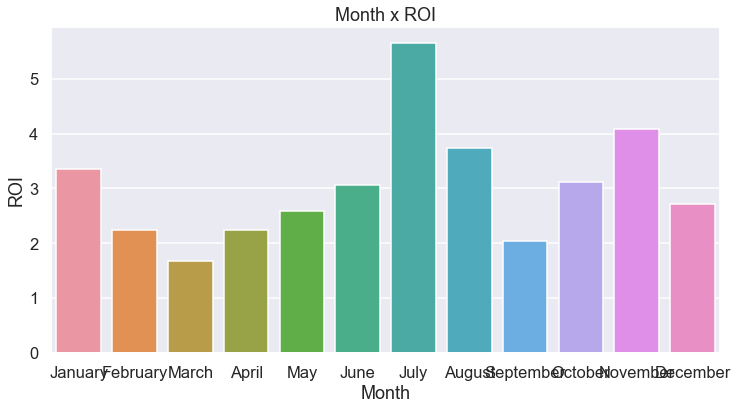

In [82]:
#month order 
month_order = ['January', 'February', 'March', 'April', 'May'
               , 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#plot

sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize=(12, 6))

sns.set_palette("mako")

sns.barplot(x = 'official_month', y = 'roi', data = month, ci = None, order = month_order)
plt.title('Month x ROI')
plt.xlabel('Month')
plt.ylabel('ROI');

- July seems to have a overall higher average ROI compared to other months 
- November and August saw similar ROI averages

In [83]:
# Movies that only made money (positive ROI)

In [84]:
# subset positive ROI
month_pos = month[month['roi'] > 0]

month_pos.head()

,title,roi,month,official_month
1,Mortal Kombat,5.106661,8.0,August
2,The Overnight,4.829980,6.0,June
4,The Secret Life of Walter Mitty,1.064409,12.0,December
5,A Walk Among the Tombstones,1.218164,9.0,September
6,Jurassic World,6.669092,6.0,June


In [1]:
#plot

sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize=(12, 6))

sns.set_palette("mako")

sns.barplot(x = 'official_month', y = 'roi', data = month_pos, ci = None, order = month_order)
plt.title('Month x ROI')
plt.xlabel('Month')
plt.ylabel('ROI');

NameError: name 'plt' is not defined

- No difference

In [86]:
#Statistically significant?

In [87]:
#ANOVA test for roi and month

cat2 = [group['roi'] for name, group in month.groupby('official_month')]
f_stat, pval = stats.f_oneway(*cat2)


alpha = 0.05 
print(pval)
if pval < alpha:
    print("statistically significant")
else:
    print("not statistically significant")

0.387937044778962
not statistically significant


## Season x ROI

In [88]:
# catogorize month into season

def season(month):
    if 3.0 <= month <= 5.0: #March 1 to May 31
        return "Spring"
    elif 6.0 <= month <= 8.0: #June 1 to August 31
        return "Summer"
    elif 9.0 <= month <= 11.0: #September 1 to November 30
        return "Autumn"
    else:
        return "Winter" # December 1 to February 28
    

#create season column
month['season'] = month['month'].apply(season)

<ipython-input-88-fa9912d86539>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['season'] = month['month'].apply(season)


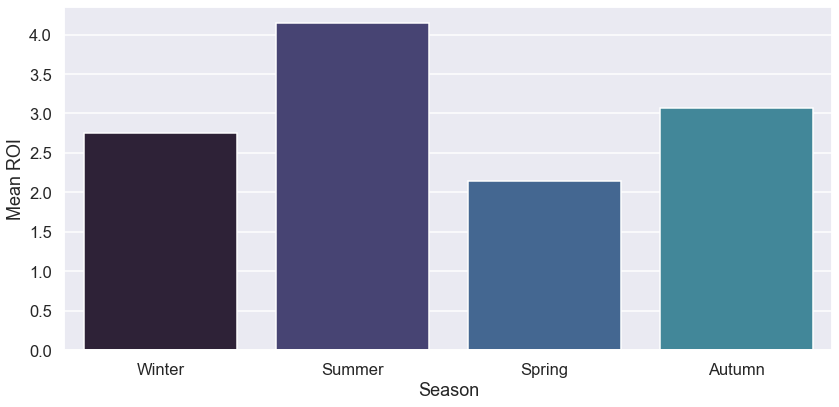

''

In [89]:
#order
season_ord = ['Winter', 'Summer', 'Spring', 'Autumn']

#plot
sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize = (12,6))
sns.barplot(x = 'season', y = 'roi', data = month, ci = False, order = season_ord)
plt.xlabel('Season')
plt.ylabel('Mean ROI') 

# display
plt.tight_layout()
plt.show()

;

 - Summer does best

In [90]:
# What about only movies that made money?
#create season column
month_pos['season'] = month['month'].apply(season)

<ipython-input-90-3f006305dc64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_pos['season'] = month['month'].apply(season)


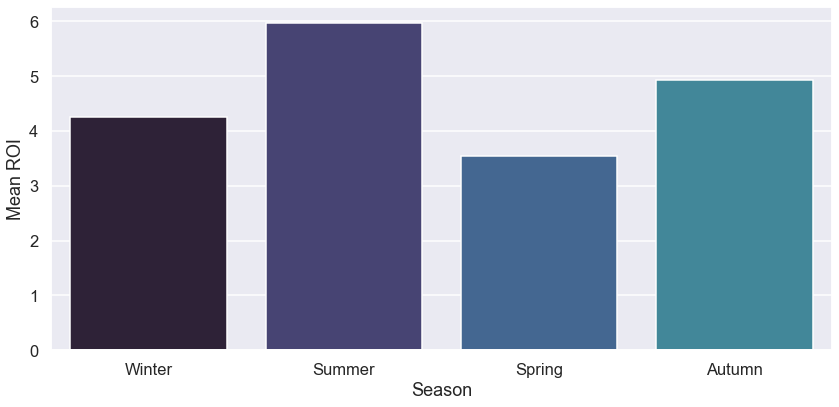

''

In [91]:
#plot
sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize = (12,6))
sns.barplot(x = 'season', y = 'roi', data = month_pos, ci = False, order = season_ord)
plt.xlabel('Season')
plt.ylabel('Mean ROI') 

# display
plt.tight_layout()
plt.show();

- no change

## Runtime x ROI

In [92]:
#create subset
runtime = df[['title','runtime', 'roi']]

#drop nulls
runtime = runtime.dropna()

In [93]:
# short films = 40 min or less
# avg film 41 min to 150 min
# long film > 150

In [94]:
#investigate
short_count = len(runtime[runtime['runtime'] < 40])
avg_count = len((runtime[(runtime['runtime'] >= 41) & (runtime['runtime'] < 150)]))
long_count = len(runtime[runtime['runtime'] > 151])

print(f'Short movies {short_count} Avg movies {avg_count} Long movies {long_count}')

Short movies 22 Avg movies 1748 Long movies 34


In [95]:
# create col
# catogorize runtime into length

def runtime_cat(runtime):
    if 0.0 <= runtime <= 40.0:
        return "Films less than 40 Minutes"
    elif 41.0 <= runtime <= 150.0:
        return "Films between 40 minutes and 150 minutes"
    else:
        return "Films longer than 150 minutes"
    
# apply and create new column
runtime['runtime_length'] = runtime['runtime'].apply(runtime_cat)

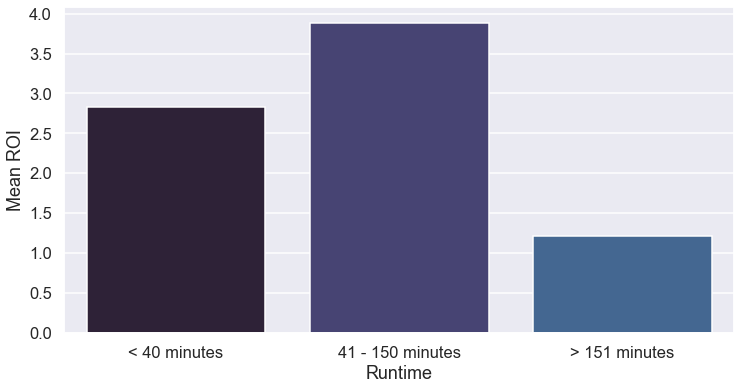

In [96]:
#plot
sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize = (12,6))
sns.barplot(x = 'runtime_length', y = 'roi', data = runtime, ci = False)

plt.xlabel('Runtime')
plt.ylabel('Mean ROI') 

#set x_ticks
custom_labels = ["< 40 minutes", "41 - 150 minutes", "> 151 minutes"]
plt.xticks(range(len(custom_labels)), custom_labels);

- Highest ROI with average length movies

''

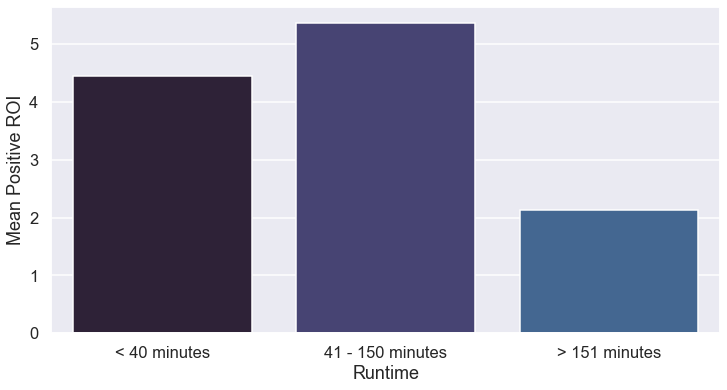

In [97]:
#movies that made money only
pos_roi_rt = runtime[runtime['roi'] > 0]

#plot
sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize = (12,6))
sns.barplot(x = 'runtime_length', y = 'roi', data = pos_roi_rt, ci = False)

plt.xlabel('Runtime')
plt.ylabel('Mean Positive ROI') 

#set x_ticks
custom_labels = ["< 40 minutes", "41 - 150 minutes", "> 151 minutes"]
plt.xticks(range(len(custom_labels)), custom_labels)
;

 - average films dominate once more


## Distributions

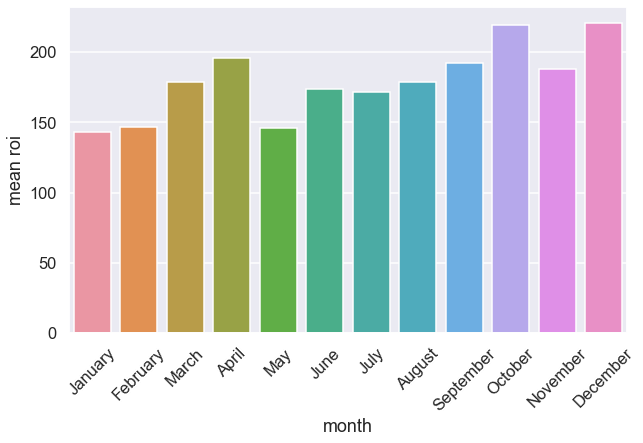

In [98]:
month_counts = month['official_month'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

# plot

plt.figure(figsize=(10, 6))
sns.set_palette("mako")
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.xlabel('month')
plt.ylabel('mean roi') 
plt.xticks(rotation=45);

 - Most movies debuted in April, October, December

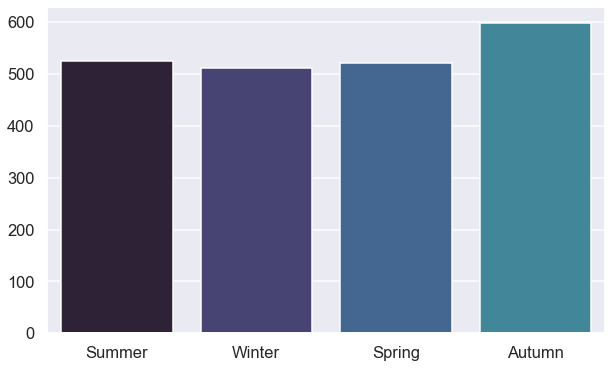

In [99]:
# by season

#plot
sns.set_style('darkgrid')
sns.set_context('talk')

season_counts = month['season'].value_counts().reindex(
    ['Summer', 'Winter', 'Spring', 'Autumn']
)

# plot
plt.figure(figsize = (10, 6))
sns.set_palette("mako")
sns.barplot(x = season_counts.index, y = season_counts.values);

## Film Runtime

In [100]:
#short films
short_films = runtime[runtime['runtime_length'] == 'Films less than 40 Minutes']

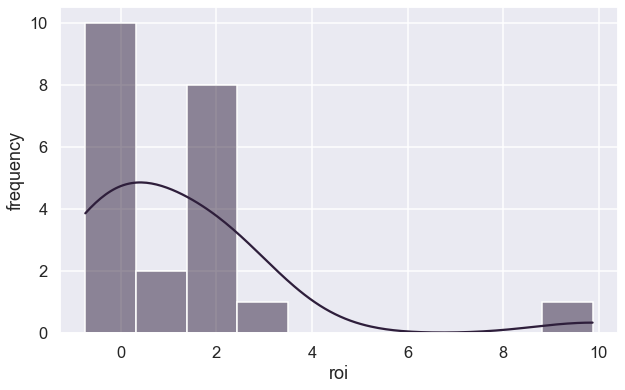

In [101]:
#plot
plt.figure(figsize = (10,6))
sns.histplot(data = short_films, x = 'roi', bins = 10, kde = True)
sns.set_palette("mako")
plt.xlabel('roi')
plt.ylabel('frequency');

In [102]:
#find outlier
high_roi_short = short_films[short_films['roi'] > 5]
high_roi_short #twilight mistake?

,title,runtime,roi,runtime_length
1898,Twilight,7.0,9.872437,Films less than 40 Minutes


''

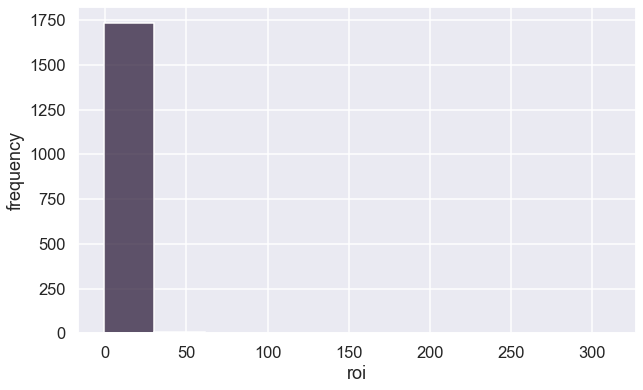

In [103]:
#average films

avg_films = runtime[runtime['runtime_length'] == 'Films between 40 minutes and 150 minutes']

# plot
plt.figure(figsize = (10, 6))
sns.histplot(data = avg_films, x ='roi', bins = 10)
sns.set_palette("mako")
plt.xlabel('roi')
plt.ylabel('frequency')
;

In [104]:
#find outlier
high_roi_avg = avg_films[avg_films['roi'] > 50]
high_roi_avg #exceptional movies #maybe we analyze them seperately? is there a commonality?

,title,runtime,roi,runtime_length
558,Paranormal Activity 2,91.0,58.170677,Films between 40 minutes and 150 minutes
578,The Devil Inside,83.0,100.759490,Films between 40 minutes and 150 minutes
610,Insidious,103.0,65.580591,Films between 40 minutes and 150 minutes
836,Benji,87.0,62.119120,Films between 40 minutes and 150 minutes
1289,Graduation Day,75.0,94.576000,Films between 40 minutes and 150 minutes
1300,Split,90.0,54.792961,Films between 40 minutes and 150 minutes
1302,Bambi,58.0,311.354312,Films between 40 minutes and 150 minutes
1393,Rocky,136.0,224.000000,Films between 40 minutes and 150 minutes
1513,Unfriended,83.0,63.364198,Films between 40 minutes and 150 minutes
1708,Get Out,104.0,50.073590,Films between 40 minutes and 150 minutes


''

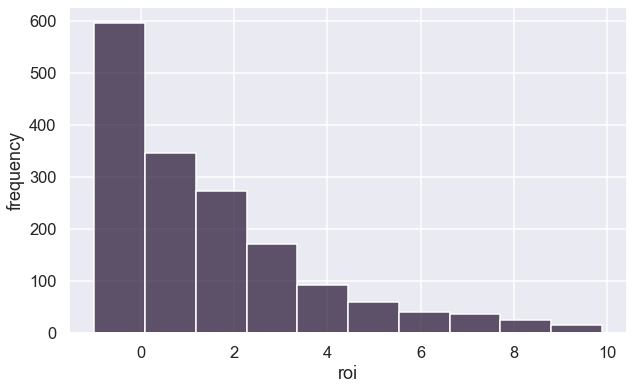

In [105]:
#avg films without outliers

avg_films_lower_roi = runtime[(runtime['runtime_length'] == 'Films between 40 minutes and 150 minutes') & (runtime['roi'] < 10)]

# plot
plt.figure(figsize = (10, 6))
sns.histplot(data = avg_films_lower_roi, x ='roi', bins = 10)
sns.set_palette("mako")
plt.xlabel('roi')
plt.ylabel('frequency')
;

- better, but skewed distribution without outliers

''

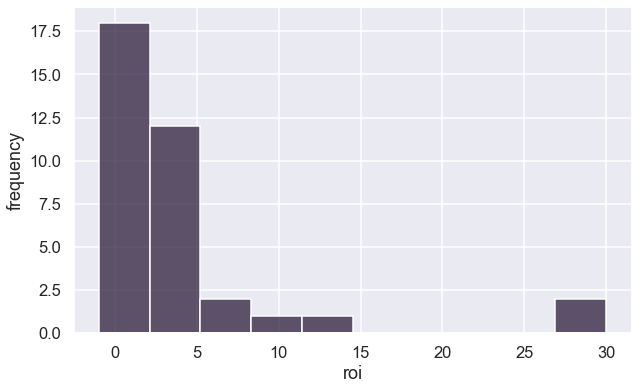

In [106]:
#long films

long_films = runtime[runtime['runtime_length'] == 'Films longer than 150 minutes']

# plot
plt.figure(figsize = (10, 6))
sns.histplot(data = long_films, x ='roi', bins = 10)
sns.set_palette("mako")
plt.xlabel('roi')
plt.ylabel('frequency')
;

- left skewed 

In [107]:
#find outlier
high_roi_long = long_films[long_films['roi'] > 25]
high_roi_long # do we keep?

,title,runtime,roi,runtime_length
1016,Maniac,160.0,27.571429,Films longer than 150 minutes
1712,Dangal,161.0,30.016276,Films longer than 150 minutes


## Budget x ROI x Month x Season

In [108]:
#subsets
under_ten = df[df['production_budget'] < 10000000]
ten_hundo = df[(df['production_budget'] >= 10000000) & (df['production_budget'] <= 100000000)]
over_hundo = df[df['production_budget'] > 100000000]

In [109]:
# by month 

#under 10 mill
under_ten_month = under_ten[['title', 'roi','month']]
# apply and create new column
under_ten_month['season'] = under_ten_month['month'].apply(season)

#10 to 1000
ten_hundo_month = ten_hundo[['title', 'roi','month']]
# apply and create new column
ten_hundo_month['season'] = ten_hundo_month['month'].apply(season)

#over 100 mill
over_hundo_month = over_hundo[['title', 'roi','month']]
# apply and create new column
over_hundo_month['season'] = over_hundo_month['month'].apply(season)

<ipython-input-109-a24f4a277d7c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_ten_month['season'] = under_ten_month['month'].apply(season)
<ipython-input-109-a24f4a277d7c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten_hundo_month['season'] = ten_hundo_month['month'].apply(season)
<ipython-input-109-a24f4a277d7c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

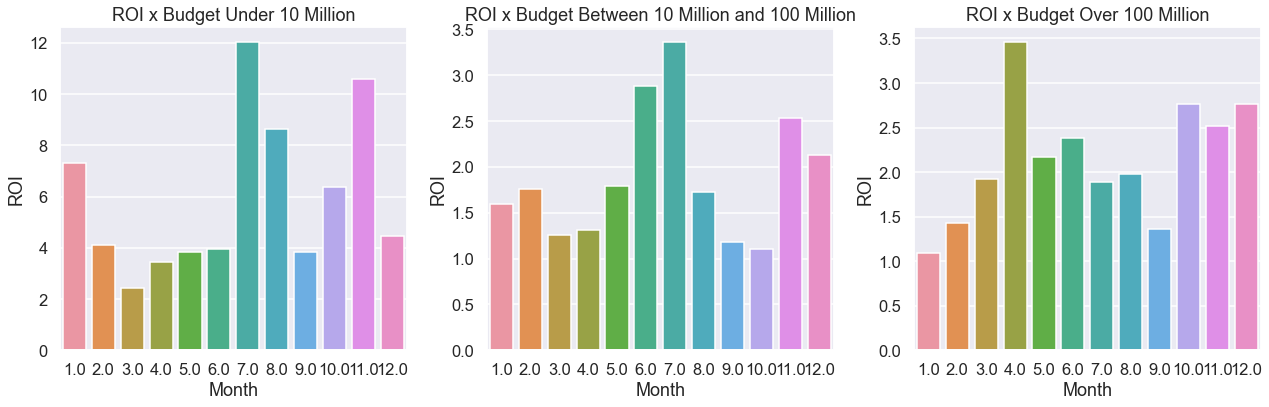

In [110]:
# Plot by month 
#plot

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#plot 1
sns.barplot(x = 'month', y = 'roi', data = under_ten_month, ci = None, ax = axes[0])
axes[0].set_title('ROI x Budget Under 10 Million')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('ROI')

#plot 2
sns.barplot(x ='month', y ='roi', data = ten_hundo_month, ci=None, ax=axes[1])
axes[1].set_title('ROI x Budget Between 10 Million and 100 Million')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('ROI')

#plot 3
sns.barplot(x = 'month', y ='roi', data = over_hundo_month, ci=None, ax=axes[2])
axes[2].set_title('ROI x Budget Over 100 Million')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('ROI')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

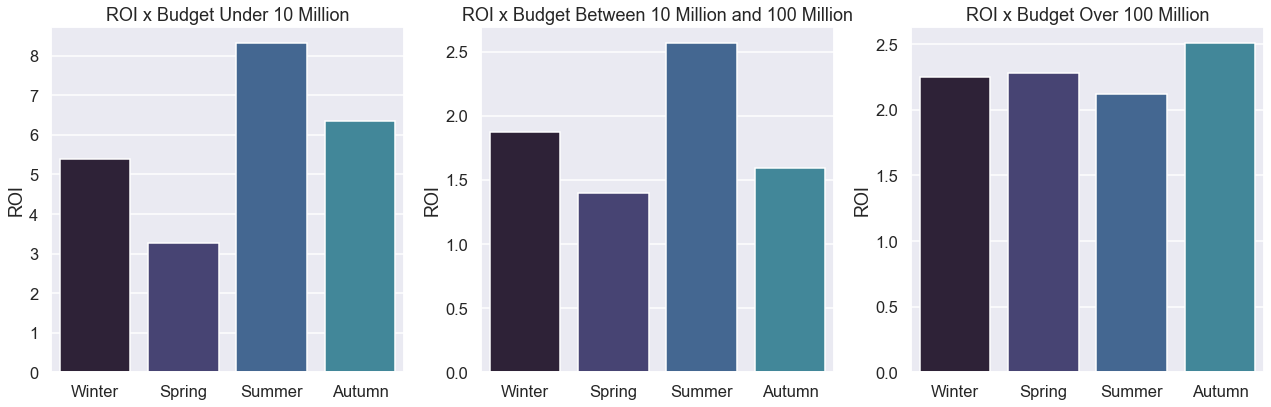

In [111]:
# plot by season
#plot by season

season_ord = ['Winter', 'Spring', 'Summer', 'Autumn']
sns.set_style('darkgrid')
sns.set_context('talk')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#plot 1
sns.barplot(x = 'season', y = 'roi', data = under_ten_month, ci = None, ax = axes[0], order = season_ord)
axes[0].set_title('ROI x Budget Under 10 Million')
axes[0].set_ylabel('ROI')
axes[0].set_xlabel(None)

#plot 2
sns.barplot(x ='season', y ='roi', data = ten_hundo_month, ci=None, ax=axes[1], order = season_ord)
axes[1].set_title('ROI x Budget Between 10 Million and 100 Million')
axes[1].set_ylabel('ROI')
axes[1].set_xlabel(None)

#plot 3
sns.barplot(x = 'season', y ='roi', data = over_hundo_month, ci=None, ax=axes[2], order = season_ord)
axes[2].set_title('ROI x Budget Over 100 Million')
axes[2].set_ylabel('ROI')
axes[2].set_xlabel(None)

#save fig
plt.savefig('roi_by_budget.jpg')

# display
plt.tight_layout()
plt.show()

## Popularity x ROI

In [112]:
#subset 
pop = df[['title', 'popularity', "vote_average", 'vote_count', 'roi']]

In [113]:
#drop rows without pop data
pop = pop[pop['popularity'].notnull()]

pop.head()

,title,popularity,vote_average,vote_count,roi
0,Foodfight!,4.705,2.1,46.0,-0.998362
2,The Overnight,6.576,6.0,200.0,4.829980
3,On the Road,8.919,5.6,518.0,-0.627468
4,The Secret Life of Walter Mitty,10.743,7.1,4859.0,1.064409
5,A Walk Among the Tombstones,19.373,6.3,1685.0,1.218164


In [114]:
#normalize popularity
def normalize_popularity(row):
    vote_average = row['vote_average']
    vote_count = row['vote_count']
    
    # make sure there is no zero 
    if vote_count != 0:
        normalized_popularity = row['popularity'] * (vote_average / vote_count)
    else:
        normalized_popularity = 0  # Set to 0 if vote_count is 0
    
    return normalized_popularity

# apply normalization
pop['normalized_popularity'] = pop.apply(normalize_popularity, axis=1)

In [115]:
# check correlation

corr, pval = stats.pearsonr(pop['roi'], pop['normalized_popularity'])

alpha = 0.05 
print(pval)
if pval < alpha:
    print("statistically significant")
else:
    print("not statistically significant")

0.3154187796679384
not statistically significant
